# Spatiotemporal patterns of drug activity in Chicago

### Luna Zhiyue Xia, Dec 2019

## Abstract

## 1. Introduction


In my previous and ongoing research, I have investigated the spatiotemporal patterns of reported incidents of narcotics-related crime (drug arrests) in Chicago from 2016 to 2018. One important assumption for this research was drug arrests data can be used as a proxy to probe the patterns of drug activities.

The following figure shows the LISA results of drug arrests. Two major hotspots are identified in the north and south regions.

In [ ]:
# Insert the figure here

In this Final project,....

2. Read, tidy, and explore the Medical Examiner Case Archive dataset
Medical Examiner Case Archive dataset was accessed from [Cook County, IL open data](https://hub-cookcountyil.opendata.arcgis.com/datasets/4f7cc9f13542463c89b2055afd4a6dc1_0/data?page=3158). The dataset records the information from deaths starting in August 2014 to the accessed date (Oct 1st, 2019).

In [75]:
import numpy as np
import geopandas as gpd
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [76]:
# read csv
mecr_gdf = gpd.read_file('data/Medical_Examiner_Case_Archive_2014_to_present.shp')
mecr_gdf.head()

,OBJECTID,CASENUMBER,INCIDENT_D,INCIDENT_S,INCIDENT_C,DEATH_DATE,AGE,GENDER,RACE,LATINO,...,PRIMARYC_2,SECONDARYC,GUNRELATED,OPIOIDS,COLD_RELAT,HEAT_RELAT,INCIDENT_Z,RESIDENCE_,RESIDENC_1,geometry
0,50827,ME2016-02747,2016-06-03T19:20:00.000Z,96 W. HICKORY ST,CHICAGO HEIGHTS,2016-06-03T19:43:00.000Z,64.0,Male,White,YES,...,None,None,None,1.0,NO,NO,60411,Chicago Heights,60411,POINT (1172909.132347077 1760940.581165574)
1,50828,ME2016-02871,2016-06-11T22:32:00.000Z,606 HANDOVER STREET,CHICAGO HEIGHTS,2016-06-11T22:57:00.000Z,15.0,Male,Black,NO,...,None,None,1,NaN,NO,NO,60411,Chicago Heights,60411,None
2,50829,ME2016-02540,2016-05-23T08:46:00.000Z,292 W 16TH PLACE,CHICAGO HEIGHTS,2016-05-23T09:01:00.000Z,33.0,Male,White,YES,...,None,"HYPERTENSIVE CARDIOVASCULAR DISEASE, CHRONIC ALCOHOLISM",None,NaN,NO,NO,60411,Chicago Heights,60411,POINT (1170459.860342745 1761535.517639741)
3,50830,ME2015-04355,2015-10-01T14:38:00.000Z,1704 EAST END AVENUE APT 209,CHICAGO HEIGHTS,2015-10-01T16:05:00.000Z,53.0,Female,Black,NO,...,None,DIABETES MELLITUS,None,NaN,NO,NO,60411,Chicago Heights,60411,POINT (1175724.130654078 1761378.053387739)
4,50831,ME2015-04571,2015-10-22T18:30:00.000Z,265 CHARLES STREET,CHICAGO HEIGHTS,2015-10-22T19:40:00.000Z,56.0,Male,Black,NO,...,None,HEPATIC CIRRHOSIS (UNKNOWN ETIOLOGY),None,NaN,NO,NO,60411,Chicago Heights,60411,POINT (1170393.161657244 1774435.936720736)


In [7]:
mecr_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 31102 entries, 0 to 31101
Data columns (total 23 columns):
OBJECTID      31102 non-null int64
CASENUMBER    31102 non-null object
INCIDENT_D    30887 non-null object
INCIDENT_S    30853 non-null object
INCIDENT_C    30180 non-null object
DEATH_DATE    31053 non-null object
AGE           30876 non-null float64
GENDER        30958 non-null object
RACE          30915 non-null object
LATINO        31102 non-null object
MANNER        30857 non-null object
PRIMARYCAU    31063 non-null object
PRIMARYC_1    540 non-null object
PRIMARYC_2    61 non-null object
SECONDARYC    8397 non-null object
GUNRELATED    4089 non-null object
OPIOIDS       4767 non-null float64
COLD_RELAT    31102 non-null object
HEAT_RELAT    31102 non-null object
INCIDENT_Z    30426 non-null object
RESIDENCE_    30024 non-null object
RESIDENC_1    30119 non-null object
geometry      27668 non-null object
dtypes: float64(2), int64(1), object(20)
memory usage: 5.5+ MB

In [9]:
# Based on the metadata, change the column name to more intuitive names
mecr_gdf.columns = ['OBJECTID ', 'CASENUMBER', 'INCIDENT_DATE', 'INCIDENT_STREET', 'INCIDENT_CITY',
       'DEATH_DATE', 'AGE', 'GENDER','RACE','LATINO','MANNER', 'PRIMARYCAUSE', 'PRIMARYCAUSE_LINEB',
        'PRIMARYCAUSE_LINEC', 'SECONDARYCAUSE', 'GUNRELATED', 'OPIOIDS', 'COLD_RELATED', 'HEAT_RELATED',
        'INCIDENT_ZIP', 'RESIDENCE_CITY', 'RESIDENCE_ZIP','geometry']

In [17]:
mecr_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 31102 entries, 0 to 31101
Data columns (total 23 columns):
OBJECTID              31102 non-null int64
CASENUMBER            31102 non-null object
INCIDENT_DATE         30887 non-null object
INCIDENT_STREET       30853 non-null object
INCIDENT_CITY         30180 non-null object
DEATH_DATE            31053 non-null object
AGE                   30876 non-null float64
GENDER                30958 non-null object
RACE                  30915 non-null object
LATINO                31102 non-null object
MANNER                30857 non-null object
PRIMARYCAUSE          31063 non-null object
PRIMARYCAUSE_LINEB    540 non-null object
PRIMARYCAUSE_LINEC    61 non-null object
SECONDARYCAUSE        8397 non-null object
GUNRELATED            4089 non-null object
OPIOIDS               4767 non-null float64
COLD_RELATED          31102 non-null object
HEAT_RELATED          31102 non-null object
INCIDENT_ZIP          30426 non-null object
RESIDENCE_

In [28]:
opioids_gdf = mecr_gdf.loc[(mecr_gdf['OPIOIDS'] == 1) & (mecr_gdf['INCIDENT_CITY'] == 'CHICAGO') ]

In [29]:
pd.set_option('display.max_colwidth', 1000) # show more information
opioids_gdf[['DEATH_DATE', 'AGE', 'GENDER','RACE','LATINO','MANNER','PRIMARYCAUSE']].sample(10)

,DEATH_DATE,AGE,GENDER,RACE,LATINO,MANNER,PRIMARYCAUSE
14466,2017-07-03T11:17:00.000Z,65.0,Male,Black,NO,ACCIDENT,"COMBINED DRUG (HEROIN, METHADONE, HYDROMORPHONE, AND GABAPENTIN) AND ETHANOL TOXICITY"
17184,2015-05-14T17:45:00.000Z,25.0,Male,White,NO,ACCIDENT,OPIATE TOXICITY
11279,2015-12-01T05:25:00.000Z,63.0,Male,Black,NO,ACCIDENT,HEROIN TOXICITY
15920,2015-09-19T09:27:00.000Z,30.0,Female,White,NO,ACCIDENT,HEROIN TOXICITY
16829,2017-08-13T06:32:00.000Z,31.0,Male,White,NO,ACCIDENT,COMBINED HEROIN AND ETHANOL TOXICITY
16118,2014-11-22T11:45:00.000Z,60.0,Male,Black,NO,ACCIDENT,HEROIN INTOXICATION
10639,2016-03-10T06:08:00.000Z,42.0,Male,White,NO,ACCIDENT,ETHANOL AND PROBABLE HEROIN TOXICITY
24088,2016-04-23T06:01:00.000Z,52.0,Male,Black,NO,ACCIDENT,"COMBINED DRUG (HEROIN, DESPROPIONYL-FENTANYL (4-ANPP), ETHANOL TOXICITY"
27048,2014-09-28T02:39:00.000Z,24.0,Male,White,NO,ACCIDENT,HEROIN TOXICITY
23671,2016-05-14T04:00:00.000Z,45.0,Male,Black,NO,ACCIDENT,"FURANYL FENTANYL, DESPROPIONYL FENTANYL (4-ANPP) AND COCAINE TOXICITY"


In [44]:
opioids_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3018 entries, 676 to 31041
Data columns (total 23 columns):
OBJECTID              3018 non-null int64
CASENUMBER            3018 non-null object
INCIDENT_DATE         3006 non-null object
INCIDENT_STREET       3018 non-null object
INCIDENT_CITY         3018 non-null object
DEATH_DATE            3018 non-null object
AGE                   3013 non-null float64
GENDER                3018 non-null object
RACE                  3018 non-null object
LATINO                3018 non-null object
MANNER                3018 non-null object
PRIMARYCAUSE          3018 non-null object
PRIMARYCAUSE_LINEB    9 non-null object
PRIMARYCAUSE_LINEC    4 non-null object
SECONDARYCAUSE        474 non-null object
GUNRELATED            0 non-null object
OPIOIDS               3018 non-null float64
COLD_RELATED          3018 non-null object
HEAT_RELATED          3018 non-null object
INCIDENT_ZIP          3017 non-null object
RESIDENCE_CITY        2918 non-

In [30]:
# read Chicago block group boundaries
chicago_bg = gpd.read_file('data/ChicagoPoly.shp')

In [48]:
chicago_bg.head(2)

,GEOID10,GEOID_Data,geometry
0,170438400002,15000US170438400002,"POLYGON ((-9787284.824242949 5160085.317449529, -9788060.556730891 5160032.785712422, -9788385.49828635 5160010.917780374, -9788397.075584127 5160010.168849842, -9788443.607033081 5160017.208570099, -9788461.86349258 5160019.754849234, -9788473.774706801 5160021.552174172, -9788474.776533429 5160021.701994051, -9788497.263179861 5160024.997141015, -9788516.744089775 5160024.248194279, -9788535.111736123 5160023.649048661, -9788544.128626598 5160023.349621235, -9788813.187815715 5160013.014690189, -9789023.692886021 5160004.627040246, -9789067.107480397 5160002.979493089, -9789258.577081205 5159995.490497628, -9789271.490109511 5159995.041064349, -9789277.167483201 5159995.190857844, -9789280.061799172 5159995.190898792, -9789285.182440229 5159995.190854642, -9789291.750306172 5159995.190894044, -9789317.687774735 5159995.190945681, -9789323.47627309 5159995.190866526, -9789323.256242357 5159996.369000004, -9789318.324600004 5159996.369000004, -9789292.3872 5159996.369000004, -97892..."
1,170312427001,15000US170312427001,"POLYGON ((-9762352.949899999 5145362.887900001, -9762380.55719999 5145362.887900001, -9762418.517199993 5145362.887900001, -9762463.601599993 5145362.289699998, -9762490.713939719 5145362.143469326, -9762491.320099996 5145362.140199996, -9762518.370799994 5145361.691399997, -9762599.411399996 5145360.495100001, -9762625.974356806 5145360.202596489, -9762626.573400002 5145360.196, -9762643.271299999 5145359.896899998, -9762693.253699997 5145359.298600003, -9762710.063100005 5145359.148999996, -9762711.579178695 5145359.125521678, -9762748.691000003 5145358.5508, -9762781.975400003 5145358.251699999, -9762864.797199994 5145356.008500005, -9762903.536299998 5145354.961800002, -9762906.096699994 5145354.812200003, -9762913.889099993 5145354.662699995, -9762916.560700001 5145354.662699995, -9762925.647957411 5145354.382054176, -9762926.2455 5145354.3636, -9762955.522600004 5145354.064499998, -9762964.718081184 5145354.064499998, -9762965.318699999 5145354.064499998, -9762965.986600002 5..."


In [31]:
print(chicago_bg.crs, opioids_gdf.crs)

{'init': 'epsg:3857'} {'init': 'epsg:3435'}


In [34]:
# conver two layers to the same proejction
opioids_gdf = opioids_gdf[opioids_gdf.geometry.notnull()] #remove some points withou geometry
opioids_gdf_prj = opioids_gdf.to_crs({'init': 'epsg:3857'})

In [35]:
import matplotlib.pyplot as plt

(-9791635.14907553, -9740778.347421844, 5083327.894810944, 5168308.332257727)

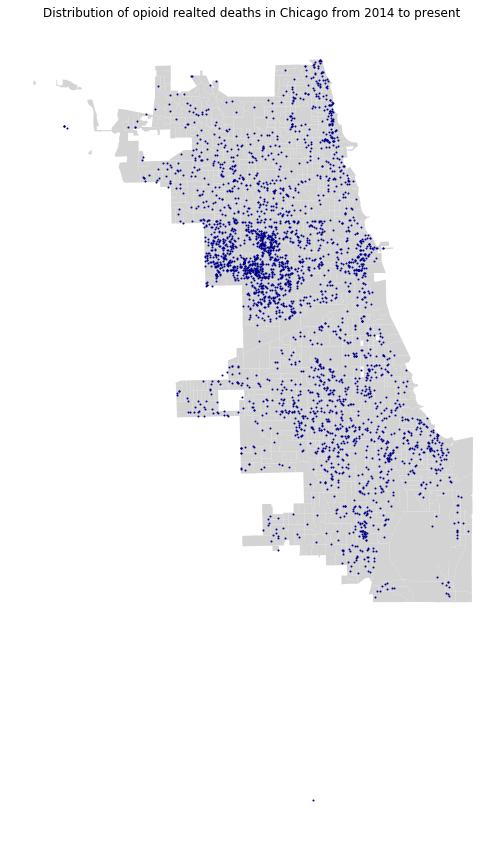

In [42]:
# plot chicago block group boundaries and points of death
fig, ax = plt.subplots(figsize=(15,15))
chicago_bg.plot(ax=ax,color='lightgray',)
opioids_gdf_prj.plot(markersize=1, color='darkblue',ax=ax)

ax.set_title('Distribution of opioid realted deaths in Chicago from 2014 to present')
ax.axis('off')

In [55]:
deathcount = gpd.sjoin(chicago_bg, opioids_gdf_prj, how='left')
deathcount = deathcount.groupby('GEOID10').size().reset_index().fillna(0)
deathcount.columns = ['GEOID10','DEATH']

In [56]:
deathcount

,GEOID10,DEATH
0,170310101001,3
1,170310101002,2
2,170310101003,2
3,170310102011,1
4,170310102012,3
...,...,...
2197,170318439002,1
2198,170318439003,1
2199,170318439004,1
2200,170318439005,1


In [57]:
chicago_opioids = chicago_bg.merge(deathcount, on = 'GEOID10', how='left')

(-9791635.14907553, -9740778.347421844, 5105013.1333303265, 5167275.701852042)

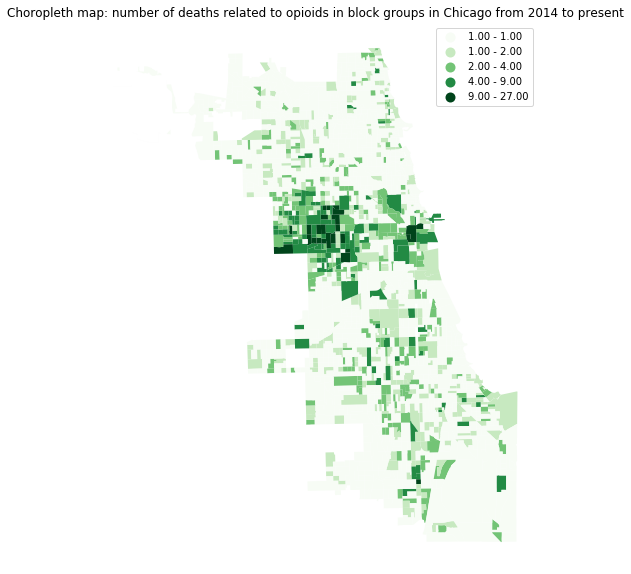

In [73]:
fig, ax = plt.subplots(figsize=(10,10))
chicago_opioids.plot(column='DEATH',  k=5, cmap='Greens', scheme='natural_breaks',legend=True, ax=ax)

ax.set_title('Choropleth map: number of deaths related to opioids in block groups in Chicago from 2014 to present')
ax.axis('off')

In [82]:
import pysal.lib as lp
import pysal.explore.esda as esda
from pysal.viz.splot import esda as esdaplot

In [80]:
wq =  lp.weights.Queen.from_dataframe(chicago_opioids)
wq.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 489, ' is an island (no neighbors)')
('WARNING: ', 1405, ' is an island (no neighbors)')


(<Figure size 1080x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016286FABC88>,
       dtype=object))

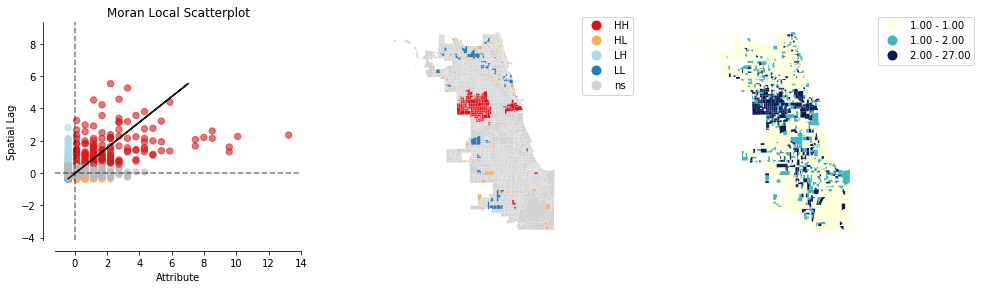

In [83]:
lisa = esda.Moran_Local(chicago_opioids['DEATH'], wq)
esdaplot.plot_local_autocorrelation(lisa, chicago_opioids, 'DEATH')